### Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## BUSINESS PROBLEM-1
BACKGROUND: The Lending Club is a peer-to-peer lending site where members make loans to 
each other. The site makes anonymized data on loans and borrowers publicly available. 

#### BUSINESS PROBLEM:
Using lending club loans data, the team would like to test below hypothesis on how different 
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)


### Data Preparation

In [4]:
#importing the data
loan_data=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\LoansData.csv")
loan_data

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [5]:
#the column names are not according to the INC rules, need to change them
loan_data.columns=loan_data.columns.str.replace(".","_")

In [6]:
loan_data.head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [8]:
#changing the loan_length datatypes
loan_data.Loan_Length=loan_data.Loan_Length.str.replace(' months','').astype(np.int16)

In [9]:
#changing the interest rate datatypes
loan_data.loc[:,'Interest_Rate']=loan_data.Interest_Rate.str.replace('%','').astype(np.float32)

In [10]:
#checking Amount_Funded_By_Investors null record
loan_data[loan_data.Amount_Funded_By_Investors.isnull()]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
2490,10000.0,NaN,11.71,36,debt_consolidation,8.40%,CA,RENT,4500.0,710-714,8.0,8404.0,1.0,3 years


In [11]:
#I cannot take mean of the population because on investigation it is 
#observed that Amount_Funded_By_Investors will be greater than Amount_Requested
loan_data.Amount_Funded_By_Investors.mean()

12002.374185674269

In [12]:
#In maximum cases the full amount was given as loan, so I am taking mode to fill missing value of Amount_Funded_By_Investors
loan_data[(loan_data.Amount_Requested==10000) & (loan_data.Loan_Length==36)].Amount_Funded_By_Investors.value_counts()

Amount_Funded_By_Investors
10000.00    156
9975.00       8
9850.00       4
9950.00       3
6350.00       1
1300.00       1
9767.84       1
9925.00       1
9725.00       1
4082.56       1
550.00        1
8851.08       1
9869.17       1
525.00        1
9875.00       1
7945.17       1
9325.00       1
7586.93       1
8175.26       1
9500.00       1
9225.43       1
9924.07       1
5334.01       1
9700.00       1
6301.07       1
Name: count, dtype: int64

In [13]:
loan_data.Amount_Funded_By_Investors.fillna(10000,inplace=True)

In [14]:
#checking based on Amount_Funded_By_Investors & Loan_Length what can be the possible values to fillna of Amount_Requested
#so going with mode
loan_data[(loan_data.Amount_Funded_By_Investors==15000) & (loan_data.Loan_Length==36)].Amount_Requested.value_counts()

Amount_Requested
15000.0    60
Name: count, dtype: int64

In [15]:
loan_data.Amount_Requested.fillna(15000,inplace=True)

In [16]:
loan_data[loan_data.Interest_Rate.isnull()]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
2484,15000.0,15000.0,NaN,36,credit_card,28.28%,OH,MORTGAGE,6666.67,690-694,15.0,14880.0,0.0,10+ years
2487,15000.0,15000.0,NaN,36,wedding,18.05%,CA,RENT,8000.00,660-664,6.0,45976.0,1.0,2 years


In [17]:
#since interest rate is missing for 36 months and Amount_Requested= 15000 in the data, 
#so filling na with the mean of 36 months interests 
mean_int=loan_data[(loan_data.Amount_Funded_By_Investors==15000) & (loan_data.Loan_Length==36)]['Interest_Rate'].mean()
mean_int

12.808135557982881

In [18]:
loan_data.Interest_Rate.fillna(mean_int,inplace=True)

In [19]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   float64
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   int16  
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [20]:
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=Intrest rate is not varying for different loan amounts
#Ha=Intrest rate is varying for different loan amounts

#CI=95%
#the level of siginificance(p-Value=0.05)

#both the variables are continuous in nature so using Pearson's test(Relationship of two continuous variables)

In [21]:
stats.pearsonr(loan_data.Interest_Rate, loan_data.Amount_Funded_By_Investors)

PearsonRResult(statistic=0.337436070969501, pvalue=1.2650048759645328e-67)

In [22]:
#Business conclusion
#since p value is less than 0.05 we can reject null hypothesis with 95% Confidence Level
#There is significant relation between loan amounts and interest rate

### b. Loan length is directly effecting intrest rate.

In [23]:
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=Loan length is not directly effecting intrest rate
#Ha=Loan length is directly effecting intrest rate

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have two loan lengths--36 and 60
#so comparing the mean of two samples using T-test

In [24]:
int_36=loan_data[loan_data.Loan_Length==36].loc[:,'Interest_Rate']
int_60=loan_data[loan_data.Loan_Length==60].loc[:,'Interest_Rate']

In [25]:
stats.ttest_ind( int_36, int_60 )

TtestResult(statistic=-23.412204361488634, pvalue=9.239888210616625e-110, df=2498.0)

In [26]:
#Business conclusion
#since p value is less than 0.05 we can reject null hypothesis with 95% Confidence Level
#There is significant relation between loan length and interest rate

### c. Interest rate varies for different purpose of loans

In [27]:
loan_data.Loan_Purpose.value_counts()

Loan_Purpose
debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: count, dtype: int64

In [28]:
int_debt_consolidation=loan_data[loan_data.Loan_Purpose=='debt_consolidation'].loc[:,'Interest_Rate']
int_credit_card=loan_data[loan_data.Loan_Purpose=='credit_card'].loc[:,'Interest_Rate']
int_other=loan_data[loan_data.Loan_Purpose=='other'].loc[:,'Interest_Rate']
int_home_improvement=loan_data[loan_data.Loan_Purpose=='home_improvement'].loc[:,'Interest_Rate']
int_major_purchase=loan_data[loan_data.Loan_Purpose=='major_purchase'].loc[:,'Interest_Rate']
int_small_business=loan_data[loan_data.Loan_Purpose=='small_business'].loc[:,'Interest_Rate']
int_car=loan_data[loan_data.Loan_Purpose=='car'].loc[:,'Interest_Rate']
int_wedding=loan_data[loan_data.Loan_Purpose=='wedding'].loc[:,'Interest_Rate']
int_medical=loan_data[loan_data.Loan_Purpose=='medical'].loc[:,'Interest_Rate']
int_moving=loan_data[loan_data.Loan_Purpose=='moving'].loc[:,'Interest_Rate']
int_vacation=loan_data[loan_data.Loan_Purpose=='vacation'].loc[:,'Interest_Rate']
int_house=loan_data[loan_data.Loan_Purpose=='house'].loc[:,'Interest_Rate']
int_educational=loan_data[loan_data.Loan_Purpose=='educational'].loc[:,'Interest_Rate']
int_renewable_energy=loan_data[loan_data.Loan_Purpose=='renewable_energy'].loc[:,'Interest_Rate']

In [29]:
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=Interest rates do not vary for different purpose of loans
#Ha=Interest rate varies for different purpose of loans

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have many categories
#so comparing the mean of the samples using Anova/F-test

In [30]:
stats.f_oneway( int_debt_consolidation,int_credit_card,int_other,int_home_improvement,int_major_purchase,int_small_business,
               int_car,int_wedding,int_medical,int_moving,int_vacation,int_house,int_educational,int_renewable_energy)

F_onewayResult(statistic=7.485078523876354, pvalue=1.1443262925297694e-14)

In [31]:
#Business conclusion
#since p value is less than 0.05 we can reject null hypothesis with 95% Confidence Level
#There is significant variation in interest rates based on loan purposes.

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores

In [32]:
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=There is no relationship between FICO scores and Home Ownership
#Ha=There is relationship between FICO scores and Home Ownership

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have two categorical datas
#So doing chi square test

In [33]:
table=pd.crosstab(loan_data.FICO_Range,loan_data.Home_Ownership)
table

Home_Ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO_Range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2
650-654,1,0,0,0,0
655-659,0,0,1,0,3
660-664,41,0,0,17,67
665-669,52,0,0,18,75
670-674,67,0,1,13,90
675-679,79,0,1,11,75
680-684,55,0,2,9,91


In [34]:
stats.chi2_contingency( table )[1]

1.2021592010244615e-35

In [35]:
#Business conclusion
#since p value is less than 0.05 we can reject null hypothesis with 95% Confidence Level
#There is significant relationship between FICO scores and Home Ownership

## BUSINESS PROBLEM - 2

#### BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.


In [36]:
price_Quotes=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")
price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [37]:
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=There is no difference in the average price quotes provided by Mary and Barry
#Ha=There is difference in the average price quotes provided by Mary and Barry

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have two samples
#so comparing the mean of two samples using T-test

In [38]:
stats.ttest_ind(price_Quotes['Barry_Price'], price_Quotes['Mary_Price'])

TtestResult(statistic=1.4147436739281787, pvalue=0.17114226132118285, df=22.0)

In [39]:
#Business conclusion
#since p value is greater than 0.05 we cannot reject null hypothesis with 95% Confidence Level
#There is no difference in the average price quotes provided by Mary and Barry

## BUSINESS PROBLEM-3

#### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [40]:
treatment_facility=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")
treatment_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [41]:
treatment_facility.rename( columns={'VAR4':'TRFF_percentage','VAR5':'CI_percentage'}, inplace=True)
treatment_facility

,Month,Reengineer,Employee_Turnover,TRFF_percentage,CI_percentage
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [42]:
prior=treatment_facility[treatment_facility.Reengineer=='Prior'].loc[:,'CI_percentage']
post=treatment_facility[treatment_facility.Reengineer=='Post'].loc[:,'CI_percentage']

In [43]:
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=There is no improvement of the critical incidence rate
#Ha=There is improvement of the critical incidence rate

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have two samples
#so comparing the mean of two samples using T-test

In [44]:
 stats.ttest_ind( prior, post )

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [45]:
#Business conclusion
#since p value is greater than 0.05 we cannot reject null hypothesis with 95% Confidence Level
#There is no improvement of the critical incidence rate.
#The reengineering effort had no impact on incidence behavioral problems and staff turnover

## BUSINESS PROBLEM-4

#### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring

In [46]:
priority=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")
priority

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [47]:
high=priority[priority.Priority=='High'].loc[:,'Days']
medium=priority[priority.Priority=='Medium'].loc[:,'Days']
low=priority[priority.Priority=='Low'].loc[:,'Days']

In [48]:
print('High:', high.mean(),
      '|Medium:', medium.mean(),
      '|Low:', low.mean())

High: 3.0236196319018402 |Medium: 2.5 |Low: 4.228358208955224


In [49]:
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=The prioritization system is not working
#Ha=The prioritization system is working

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have many categories
#so comparing the mean of the samples using Anova/F-test

In [50]:
stats.f_oneway(high,medium,low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [51]:
#Business conclusion
#since p value is greater than 0.05 we cannot reject null hypothesis with 95% Confidence Level
#The prioritization system is not working.

## BUSINESS PROBLEM-5

#### BUSINESS PROBLEM: Use the survey resultsto addressthe following questions

In [52]:
film=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Films.csv")
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


#### a. What is the overall level of customer satisfaction?

In [53]:
def review(x):
    if x==1:
        return 'Excellent'
    elif x==2:
        return 'Good'
    elif x==3:
        return 'Average/Fair'
    elif x==4:
        return  'Poor'
    else:
        return 'Very Poor'

In [54]:
film.Overall=film.Overall.apply(review)

<Axes: xlabel='Overall', ylabel='count'>

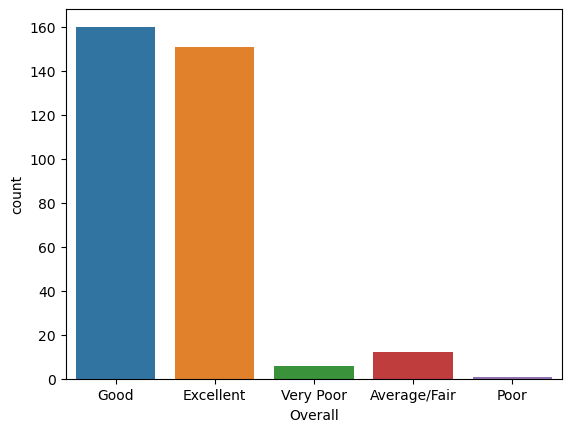

In [55]:
#So overall customers are well satisfied
sns.countplot(data=film,x='Overall')

#### b. What factors are linked to satisfaction?

In [56]:
#Signage-Overall Relationship
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=No relationship
#Ha=There is relationship

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have two categorical datas
#So doing chi square test

In [57]:
ovr_sin = pd.crosstab( film.Sinage,film.Overall )
ovr_sin

Overall,Average/Fair,Excellent,Good,Poor,Very Poor
Sinage,,,,,
1.0,0,90,22,0,1
2.0,4,43,107,0,2
3.0,8,13,25,1,1
4.0,0,2,4,0,0
5.0,0,2,2,0,1


In [58]:
stats.chi2_contingency( ovr_sin )[1]

2.916411365201814e-18

In [59]:
#Business conclusion
#since p value is less than 0.05 we can reject null hypothesis with 95% Confidence Level
#There is significant relationship between Signage and Overall

In [60]:
#Parking-Overall Relationship
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=No relationship
#Ha=There is relationship

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have two categorical datas
#So doing chi square test

In [61]:
ovr_park = pd.crosstab( film.Parking,film.Overall )
ovr_park

Overall,Average/Fair,Excellent,Good,Poor,Very Poor
Parking,,,,,
1.0,2,105,26,0,2
2.0,3,40,109,0,1
3.0,5,4,20,0,0
4.0,1,2,3,0,1
5.0,1,0,1,1,1


In [62]:
stats.chi2_contingency( ovr_park )[1]

1.316195441814311e-38

In [63]:
#Business conclusion
#since p value is less than 0.05 we can reject null hypothesis with 95% Confidence Level
#There is significant relationship between Parking and Overall

In [64]:
#Clean-Overall Relationship
#State the Null hypothesis(Ho) and Alternate hypothesis(Ha)
#Ho=No relationship
#Ha=There is relationship

#CI=95%
#the level of siginificance(p-Value=0.05)

#We have two categorical datas
#So doing chi square test

In [65]:
ovr_clean = pd.crosstab( film.Clean,film.Overall )
ovr_clean

Overall,Average/Fair,Excellent,Good,Poor,Very Poor
Clean,,,,,
1.0,3,104,35,0,2
2.0,5,39,106,1,1
3.0,4,6,14,0,0
4.0,0,1,4,0,0
5.0,0,1,0,0,1


In [66]:
stats.chi2_contingency( ovr_clean )[1]

5.517448379868074e-19

In [67]:
#Business conclusion
#since p value is less than 0.05 we can reject null hypothesis with 95% Confidence Level
#There is significant relationship between Clean and Overall

#### c. What is the demographic profile of Film on the Rocks patrons?

In [68]:
film.Movie.value_counts()

Movie
Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: count, dtype: int64

In [69]:
film.Gender.unique()

array(['Female', 'Male', '2', '1'], dtype=object)

In [70]:
#Changing the name
film.Gender=np.where(film.Gender=='1','Male',np.where(film.Gender=='2','Female',film.Gender))

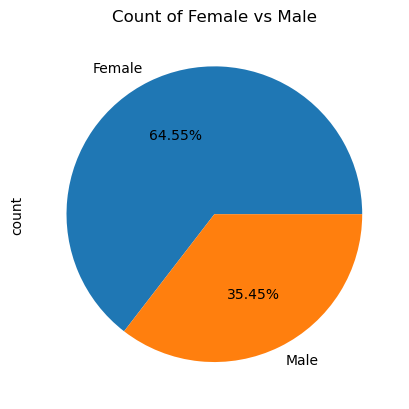

In [71]:
plt.title('Count of Female vs Male')
film.Gender.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [72]:
film.Marital_Status.unique()

array(['Married', 'Single', 'Slngle', '1', '2', nan], dtype=object)

In [73]:
film.Marital_Status.value_counts()

Marital_Status
2          208
1           88
Single      18
Married     12
Slngle       2
Name: count, dtype: int64

In [74]:
film.Marital_Status=np.where(film.Marital_Status=='1','Married',np.where(film.Marital_Status=='2','Single',
                                                     np.where(film.Marital_Status=='Slngle','Single',film.Marital_Status)))

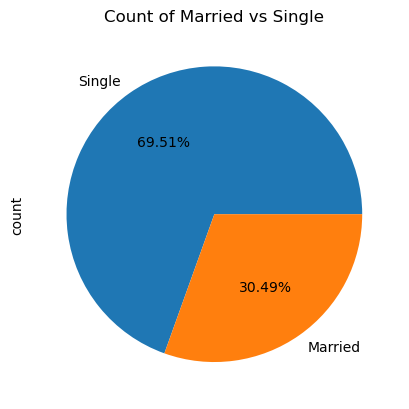

In [75]:
plt.title('Count of Married vs Single')
film.Marital_Status.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

<Figure size 640x480 with 0 Axes>

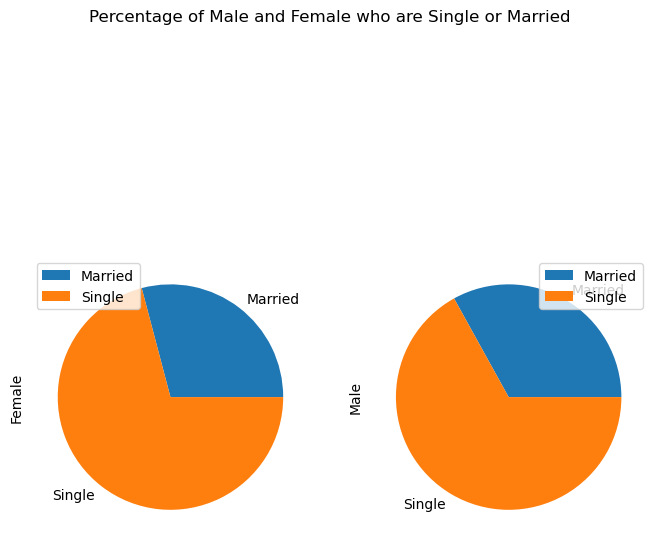

In [97]:
plt.figure(layout='constrained')
film.pivot_table(index='Marital_Status',columns='Gender',
                 values='Movie',aggfunc='count').plot(kind='pie',subplots=True,
                                                      title='Percentage of Male and Female who are Single or Married',figsize=(8,8))
plt.show()

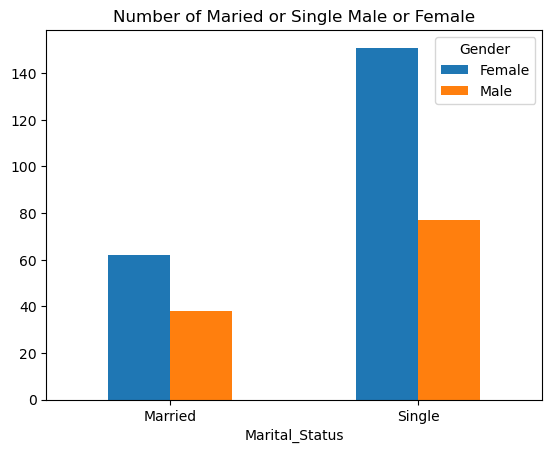

In [91]:
film.pivot_table(index='Marital_Status',columns='Gender',values='Movie',aggfunc='count').plot(kind='bar',rot=0,title='Number of Maried or Single Male or Female')
plt.show()

In [78]:
film.Income.value_counts()

Income
1.0    142
3.0     90
2.0     82
Name: count, dtype: int64

In [79]:
film.Income=np.where(film.Income==1,'Less than $50,000',np.where(film.Income==2,"$ 50,000-$ 100,000",
                                                     np.where(film.Income==3,'$100,000+',film.Income)))

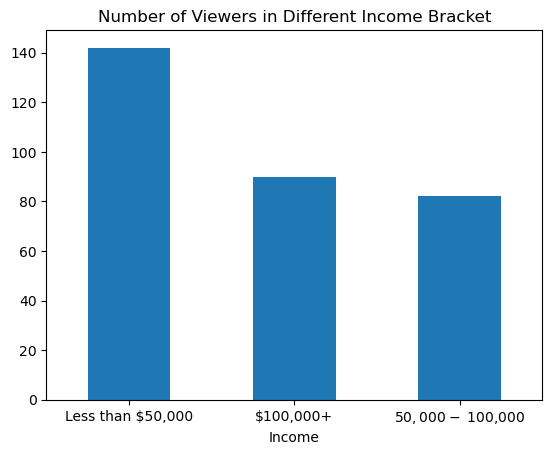

In [92]:
film.Income.value_counts()[:3].plot(kind='bar',rot=0,title='Number of Viewers in Different Income Bracket')
plt.show()

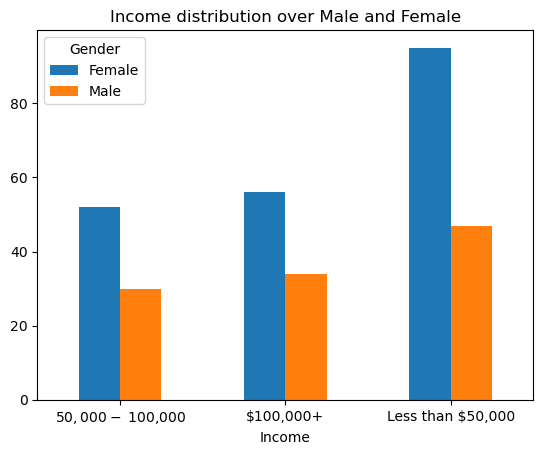

In [94]:
film.pivot_table(index='Income',columns='Gender',values='Movie',aggfunc='count')[:3].plot(kind='bar',rot=0,title='Income distribution over Male and Female')
plt.show()

#### d. In what media outlet(s) should the film series be advertised?

In [98]:
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,Good,3.0,"Less than $50,000",5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,Excellent,2.0,"Less than $50,000",5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,Good,4.0,"Less than $50,000",5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,Good,4.0,"Less than $50,000",5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,Excellent,3.0,"$100,000+",1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,Excellent,2.0,"Less than $50,000",1
326,0,Old School,Male,Married,2.0,2.0,2.0,Good,3.0,"$100,000+",5
327,0,Old School,Female,Married,2.0,1.0,1.0,Good,2.0,"$ 50,000-$ 100,000",5
328,0,Old School,Male,Married,1.0,1.0,1.0,Excellent,2.0,"Less than $50,000",3


Hear_About:The patron’s response

1 = television

2 = newspaper

3 = radio

4 = website

5 = word of mouth


In [99]:
film.Hear_About.value_counts()

Hear_About
5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: count, dtype: int64

In [ ]:
#Conclusion
#The popularity of the film is mainly due to word of mouth
#The frequency of advertisement should be increased on website and television